In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import glob
from functools import reduce
import os
from subprocess import call
import sys
sys.path.append('../')
from package_global_functions import *

def getTimeEvosPath():
    extSSDpath = getExternalSSDpath()
    if os.path.exists(extSSDpath):
        path = extSSDpath + getProjectFoldername() + '/evo_to_stationary_frozen/time_evos_more_sites'
    else:
        print('there is no path. Espavilaaaaa!')
    return path

def get_avg_traj(dfs):
    df_avg = reduce(lambda a,b: a.add(b, fill_value=0), dfs)
    df_avg = df_avg/len(dfs)
    return df_avg

colorCode_Nsites = {2:{'f0':'xkcd:red', 'f1':'xkcd:green', 'f2':'xkcd:blue'},
                    3:{'f0':'xkcd:red', 'f1':'xkcd:violet', 'f2':'xkcd:green', 'f3':'xkcd:blue'},
                    4:{'f0':'xkcd:red', 'f1':'xkcd:orange', 'f2':'xkcd:violet', 'f3':'xkcd:green', 'f4':'xkcd:blue'}}

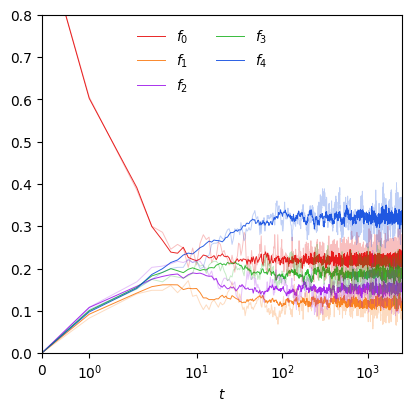

In [15]:
N, Nsites = 35, 4
ar, ir, er, push = 20.0, 4.0, 1.5, 0
# pis = [0.3, 0.3, 0.3]
pis = [0.2, 0.2, 0.2, 0.2]
# qs = [6.0, 7.0, 10.0]
qs = [5.0, 6.0, 7.0, 10.0]
l, ic = 0.6, 'N' 

pushLabel = "push" if push == ".true." else "nopush"
folder = (f"time_evo_csv_N_{N}_Nsites_{Nsites}_pis_{'_'.join([str(pi) for pi in pis])}"
                 f"_qs_{'_'.join([str(q) for q in qs])}_l_{round(l,2)}_ar_{ar}_ir_{ir}_er_{er}_{pushLabel}_ic_{ic}")

files = glob.glob(f'{getTimeEvosPath()}/{folder}/*')

dfs = [pd.read_csv(file) for file in files]

df_avg = get_avg_traj(dfs)

fig, ax = plt.subplots(1,1, figsize=(4,4), constrained_layout=True)
ax.set(xlabel='$t$', xscale='symlog', xlim=(0,2500), ylim=(0,0.8))
for i in range(Nsites+1):
    ax.plot(df_avg['iter'], df_avg[f'f{i}'], alpha=0.85, lw=0.7, label=f'$f_{i}$', color=colorCode_Nsites[Nsites][f'f{i}'])
# average over ten realizations
df_avg = get_avg_traj(dfs[:10])
for i in range(Nsites+1):
    ax.plot(df_avg['iter'], df_avg[f'f{i}'], alpha=0.25, lw=0.7, color=colorCode_Nsites[Nsites][f'f{i}'])
ax.legend(frameon=False, loc=(0.25,0.75), ncol=2)

# Pie chart analysis of the stationary state:

In [25]:
N, Nsites = 35, 4
ar, ir, er, push = 20.0, 9.0, 1.5, 0
# pis = [0.3, 0.3, 0.3]
pis = [0.2, 0.2, 0.2, 0.2]
# qs = [6.0, 7.0, 10.0]
qs = [5.0, 6.0, 7.0, 10.0]
l, ic = 0.6, 'N' 

pushLabel = "push" if push == ".true." else "nopush"
folder = (f"time_evo_csv_N_{N}_Nsites_{Nsites}_pis_{'_'.join([str(pi) for pi in pis])}"
                 f"_qs_{'_'.join([str(q) for q in qs])}_l_{round(l,2)}_ar_{ar}_ir_{ir}_er_{er}_{pushLabel}_ic_{ic}")

files = glob.glob(f'{getTimeEvosPath()}/{folder}/*')
dfs = [pd.read_csv(file) for file in files]

def get_states(files):
    for filee in files[:5]:
        df = pd.read_csv(filee)
        states = [0, 0, 0, 0, 0, 0] # [fk > 2*fk-1, fk > fk-1, fk == fk-1, fk-1 > fk, fk-1 > 2*fk, OTHER]
        prevsum = 0
        for row in df[50:210].itertuples():
            fk, fkmin1 = row[Nsites+1], row[Nsites]
            if fk > 2*fkmin1:
                states[0] += 1
            elif fk > fkmin1:
                states[1] += 1
            elif fk == fkmin1:
                states[2] += 1
            elif fkmin1 > 2*fk:
                states[4] += 1
            elif fkmin1 > fk:
                states[3] += 1
            else:
                states[5] += 1
        if not len(df[50:210]) == (sum(states) - prevsum):
            print('errorrrr')
        prevsum = sum(states)
    return states



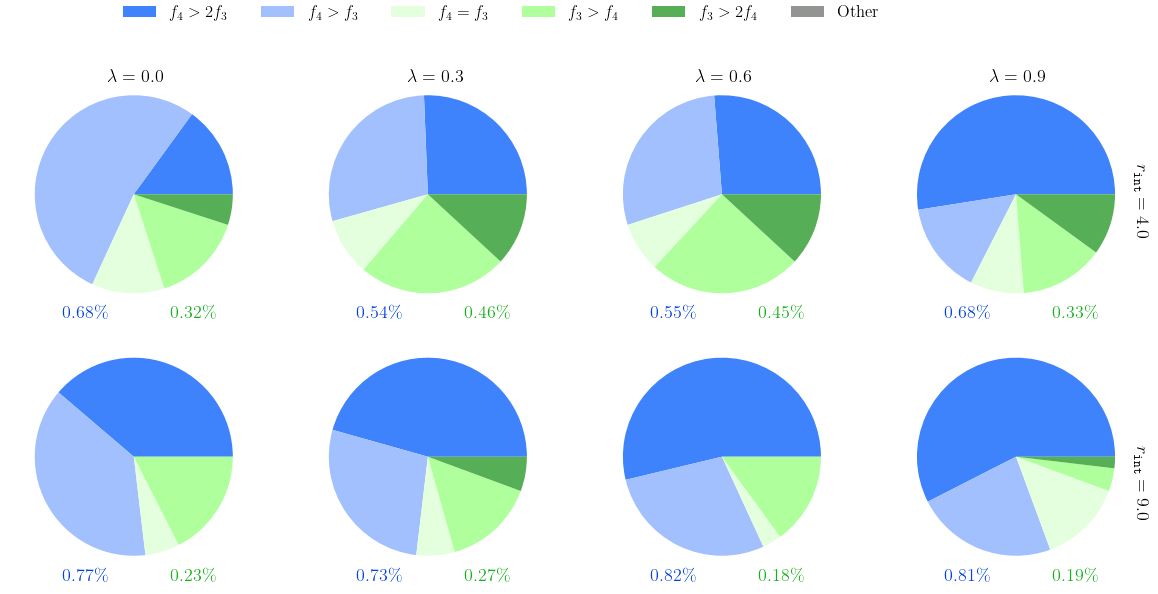

In [31]:
N, Nsites = 35, 4
ar, er, push = 20.0, 1.5, 0
pis = [0.2, 0.2, 0.2, 0.2]
qs = [5.0, 6.0, 7.0, 10.0]
ic = 'N' 
pushLabel = "push" if push == ".true." else "nopush"

latexFont(titlesize=11, ticklabelssize=11, labelsize=13, legendsize=12)

fig, ax = plt.subplots(2,4, figsize=(12,6))
fig.subplots_adjust(left=0.01, right=0.99, bottom=0.05, top=0.90, hspace=0.06, wspace=0.001)
labels = [f'$f_{Nsites} > 2f_{Nsites-1}$', f'$f_{Nsites} > f_{Nsites-1}$', f'$f_{Nsites} = f_{Nsites-1}$', f'$f_{Nsites-1} > f_{Nsites}$', f'$f_{Nsites-1} > 2 f_{Nsites}$', 'Other']
colors = ['xkcd:dodger blue', 'xkcd:pastel blue', '#e4ffde', 'xkcd:pastel green', 'xkcd:dark pastel green', 'xkcd:gray']

for i,ir in enumerate([4.0, 9.0]):
    for j,l in enumerate([0.0, 0.3, 0.6, 0.9]):
        folder = (f"time_evo_csv_N_{N}_Nsites_{Nsites}_pis_{'_'.join([str(pi) for pi in pis])}"
                f"_qs_{'_'.join([str(q) for q in qs])}_l_{round(l,2)}_ar_{ar}_ir_{ir}_er_{er}_{pushLabel}_ic_{ic}")
        files = glob.glob(f'{getTimeEvosPath()}/{folder}/*')
        states = get_states(files)
        # ax[i,j].pie(states, labels=labels, colors=colors, autopct='%1.1f%%')
        if i == 0 and j == 0:
            # wedges, text, autotexts = ax[i,j].pie(states, colors=colors, autopct='%1.1f%%')
            wedges, text = ax[i,j].pie(states, colors=colors)
        else:
            ax[i,j].pie(states, colors=colors)
        # if i == 0:
        #     ax[i,j].set_title(f'$\lambda = {l/100}$')
        posis = ax[i,j].get_position()
        op_choice,sop_choice = (states[0]+states[1])/sum(states), (states[2]+states[3]+states[4])/sum(states)
        fig.text((posis.xmax+posis.xmin)/2-0.06, posis.ymin, f'{round(op_choice,2)}\%', color='xkcd:blue', fontsize=13)
        fig.text((posis.xmax+posis.xmin)/2+0.03, posis.ymin, f'{round(sop_choice,2)}\%', color='xkcd:green', fontsize=13)

fig.legend(wedges, labels, loc=(0.1, 0.954), ncol=6, frameon=False)
# ax[0,0].text(0.5, 1.0, '$\lambda = 0.0$', transform=ax[0,0].transAxes)

height_lambda_labels = 0.88
fig.text(0.11, height_lambda_labels, '$\lambda = 0.0$', fontsize=13)
fig.text(0.36, height_lambda_labels, '$\lambda = 0.3$', fontsize=13)
fig.text(0.60, height_lambda_labels, '$\lambda = 0.6$', fontsize=13)
fig.text(0.845, height_lambda_labels, '$\lambda = 0.9$', fontsize=13)

fig.text(0.965, 0.625, r'$r_{\tt int}= 4.0$', fontsize=13, rotation=270)
fig.text(0.965, 0.155, r'$r_{\tt int}= 9.0$', fontsize=13, rotation=270)

fig.savefig(f"pie_charts_different_states_quenched_N_{N}_stationary_Nsites_{Nsites}_pis_{'_'.join([str(pi) for pi in pis])}_qs_{'_'.join([str(q) for q in qs])}.pdf")